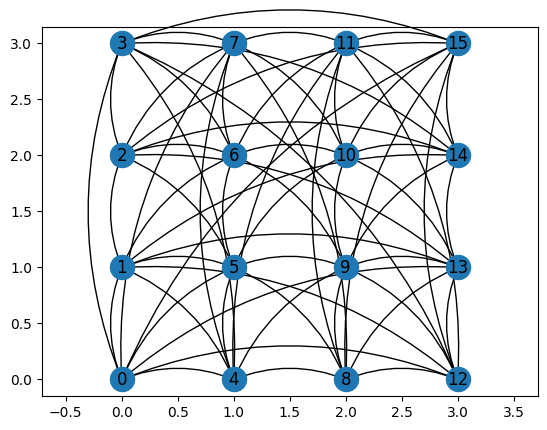

In [1]:
import netket as nk
# 设置2D晶格的参数
L = 4 # 晶格长度，即晶格中包含的节点数
N = L * L  # 晶格中的节点总数
J2 = 0.55  # 下一个最近邻相互作用的耦合常数，表示相邻节点之间的相互作用强度

# 创建2D晶格
lattice = nk.graph.Grid(extent=[L, L], pbc=[True, True], max_neighbor_order=2)

lattice.draw() 

# 创建Hilbert空间
hilbert = nk.hilbert.Spin(s=1/2, N=lattice.n_nodes, total_sz=0)

# 创建哈密顿量
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=lattice, J=[1.0, J2])

结果将保存在： /Users/shenlong/Documents/Repositories/Projects/SHS_ViT/Jupyter/2d/2d-J1-J2/results
J2 =  0.55
The optimized ViT energy is E0 =  -0.5231909482704703
Exact ground-state energy E0 =  -0.5235945676395836
Final relative error =  0.0007708624077839806


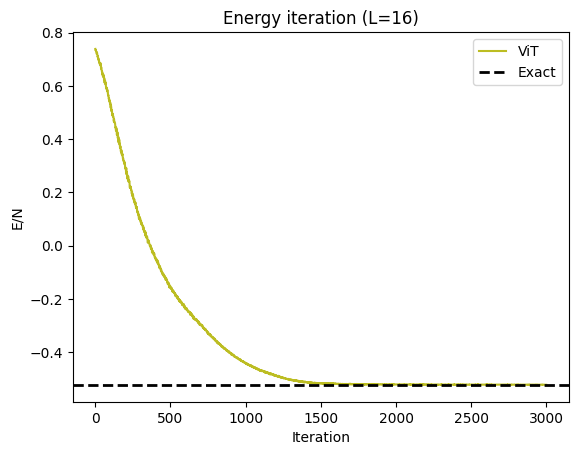

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# 假定 N 已经定义，例如:
# N = 16

from pathlib import Path

current_dir = Path(os.getcwd())
local_dir = current_dir / 'results'


log_file = os.path.join(local_dir, f"L={L}", f"J2={J2:.2f}", f"L={L}_J2={J2:.2f}.log")
with open(log_file, 'r') as f:
    data_ViT = json.load(f)

min_iter = 0
# max_iter = len(data_ViT['Energy']['iters']) 
max_iter = 8000
iters_ViT = data_ViT['Energy']['iters'][min_iter:max_iter]
energy_ViT = [e / (4*N) for e in data_ViT['Energy']['Mean']['real'][min_iter:max_iter]]

print('J2 = ', J2)
print('The optimized ViT energy is E0 = ', np.real(energy_ViT[-1]))


if L <= 4:
    # 计算基态能量
    evals = nk.exact.lanczos_ed(hamiltonian, compute_eigenvectors=False)  # 使用Lanczos算法计算哈密顿量的本征值
    exact_gs_energy = evals[0] / (4*N)  # 基态能量除以四
    print('Exact ground-state energy E0 = ', exact_gs_energy)

    # 计算相对误差的绝对值
    relative_errors = [abs((e - exact_gs_energy) / exact_gs_energy) for e in energy_ViT]

    # 打印最终相对误差
    final_relative_error = relative_errors[-1]
    print('Final relative error = ', final_relative_error)

# 绘制能量迭代图（上下限自动适应）
fig, ax1 = plt.subplots()
ax1.plot(iters_ViT, energy_ViT, color='C8', label='ViT')
ax1.set_ylabel('E/N')
ax1.set_xlabel('Iteration')
ax1.set_title(f'Energy iteration (L={N})')

if 'exact_gs_energy' in globals():
    # 绘制参考的基态能量横线
    ax1.axhline(y=exact_gs_energy, color='k', linewidth=2, linestyle='--', label='Exact')

ax1.legend()
ax1.relim()
ax1.autoscale_view()  # 自动调整上下限
plt.show()